# Prova 2 - Emanuel Staub Araldi

## 1)

### a)
$$
h[n] = ((1/2)^n+(3/4)^n)u(n) = (0.5^n)u(n) + (0.75^n)u(n) \\~\\
H(z) = \dfrac{1}{1-0.5z^{-1}} + \dfrac{1}{1-0.75z^{-1}}, |z| \in (0.5, \infty) \cap (0.75, \infty) \\~\\
z > 0.75 \\~\\
$$

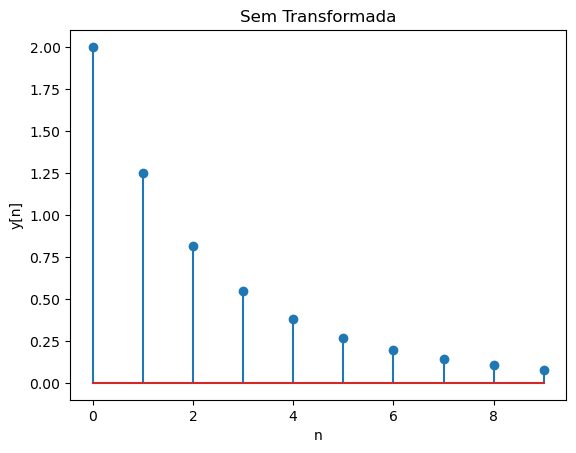

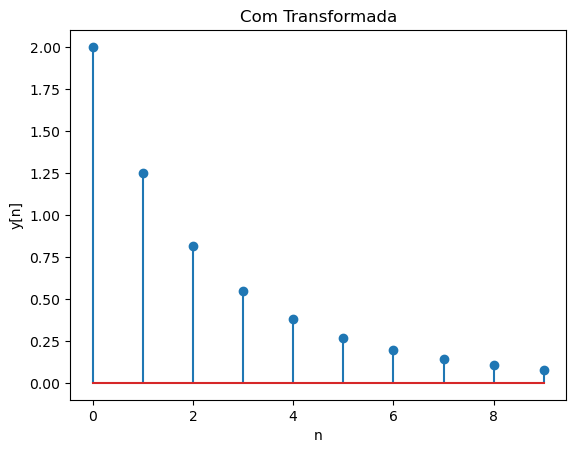

In [10]:
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy as np

import DSP

n = np.arange(0, 10)
## Sem transformada
DSP.plot([h, n], title="Sem Transformada") # Como é ao impulso x*h = h
## Com transformada
a = [1, -1.25, 0.375]
b = [2, -1.25]
x = np.zeros(10)
x[0] = 1
y = sp.lfilter(b, a, x)
DSP.plot([y, n], title="Com Transformada")

## 1)
### c)
Já foi usada, mas:
$$
H(z) = \dfrac{1}{1-0.5z^{-1}} + \dfrac{1}{1-0.75z^{-1}} = \dfrac{1+1-z^{-1}\cdot(0.5+0.75)}{(1-0.75z^{-1})\cdot(1-0.5z^{-1})} \\~\\
H(z) = \dfrac{2-1.25z^{-1}}{1-1.25z^{-1}+0.375z^{-2}} \\~\\
a = [1, -1.25, 0.375] \newline
b = [2, -1.25] \\~\\
y[n] - 1.25\cdot y[n-1] + 0.375\cdot y[n-2] = 2\cdot x[n] - 1.25 \cdot x[n-1] \newline
$$

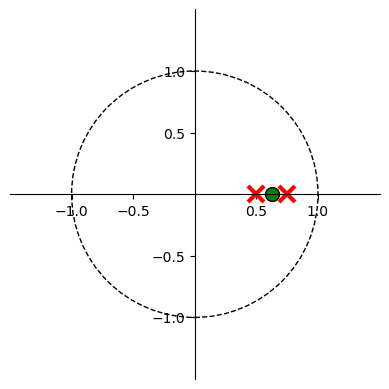

Zeros: [0.625]

Polos: [0.75 0.5 ]



In [21]:
from matplotlib import rcParams
from matplotlib.figure import Figure
from matplotlib import patches
# get a figure/plot
ax = plt.subplot(111)

# create the unit circle
uc = patches.Circle((0, 0), radius=1, fill=False,
                        color='black', ls='dashed')
ax.add_patch(uc)
# Get the poles and zeros
p = np.roots(a)
z = np.roots(b)
k = 1 # Está aqui para normalizar o resultado, não é necessário neste caso
# Plot the zeros and set marker properties
t1 = plt.plot(z.real, z.imag, 'go', ms=10)
plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
        markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
             markeredgecolor='r', markerfacecolor='r')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set the ticks
r = 1.5
plt.axis('scaled')
plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]
plt.xticks(ticks)
plt.yticks(ticks)
plt.show()
print("Zeros: " + str(np.roots(b)) + "\n")
print("Polos: " + str(np.roots(a)) + "\n")

## 2)
$$
y[n] - 2.5y[n-1] + y[n-2] = 4x[n] - 6.5x[n-1] \\~\\
a = [1, -2.5, 1] \newline
b = [4, -6.5]    \\~\\
H(z) = \dfrac{4 - 6.5z^{-1}}{1 - 2.5z^{-1} + z^{-2}} \\~\\
$$
Utilizando a função pfss do scilab:

$$
H(z) = \dfrac{1.5z^{-1}}{1-0.5z^{-1}} + \dfrac{2z^{-1}}{1-2z^{-1}} + 4 \\~\\
h(n) = (4\delta (n) + 1.5\cdot 0.5^{n-1} + 2\cdot 2^{n-1})u(n) \\~\\
h(n) = (4\delta (n) + 3\cdot 0.5^{n} + 2^{n})u(n) \\~\\
$$

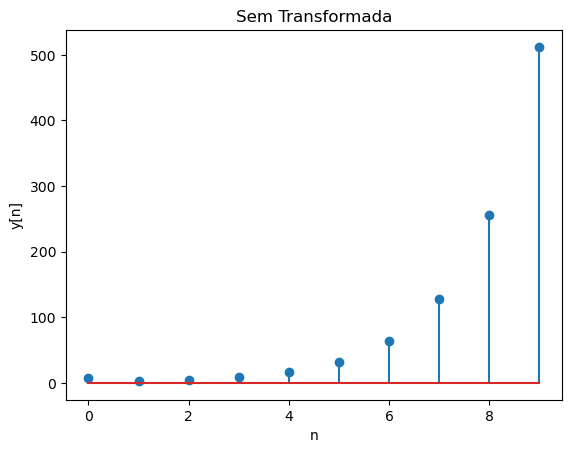

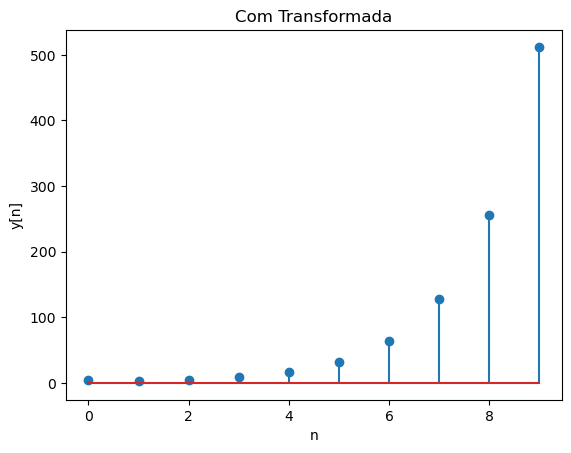

In [30]:
n = np.arange(0, 10)
h = 3*0.5**n + 2.0**n
h[0] = h[0] + 4
## Sem transformada
DSP.plot([h, n], title="Sem Transformada") # Como é ao impulso x*h = h
## Com transformada
a = [1, -2.5, 1]
b = [4, -6.5]
x = np.zeros(10)
x[0] = 1
y = sp.lfilter(b, a, x)
DSP.plot([y, n], title="Com Transformada")

$$
H(z) = \dfrac{1.5z^{-1}}{1-0.5z^{-1}} + \dfrac{2z^{-1}}{1-2z^{-1}} + 4 \\~\\
X(z) = 1+z^{-1}+z^{-2}+z^{-3}+z^{-4} \\~\\
Y(z) = H(z)\cdot X(z) = \sum_{n=0}^{n=4} H(z)z^{-n} \\~\\
y(n) = \sum_{\tau=0}^{\tau=4} {h(n-\tau)}
$$

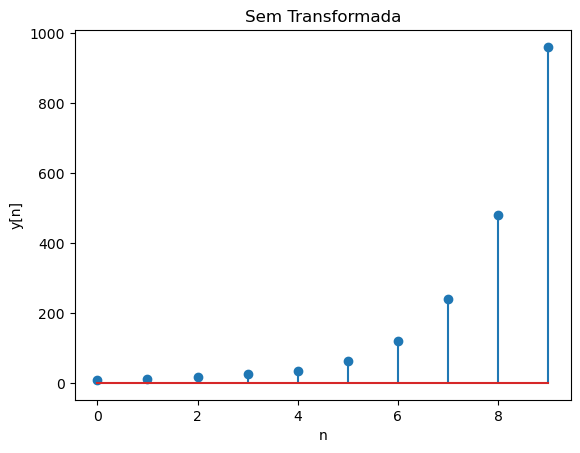

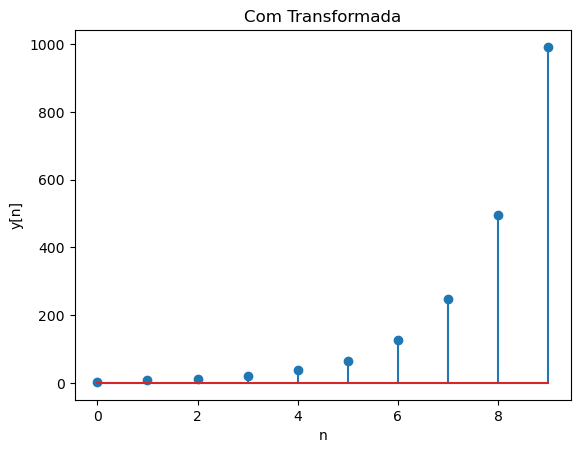

In [32]:
n = np.arange(0, 10)
h = 3*0.5**n + 2.0**n
h[0] = h[0] + 4
y = np.zeros(10)
y[0] = h[0]
y[1] = h[0] + h[1]
y[2] = h[0] + h[1] + h[2]
y[3] = h[0] + h[1] + h[2] + h[3]
y[4] = h[1] + h[2] + h[3] + h[4]
y[5] = h[2] + h[3] + h[4] + h[5]
y[6] = h[3] + h[4] + h[5] + h[6]
y[7] = h[4] + h[5] + h[6] + h[7]
y[8] = h[5] + h[6] + h[7] + h[8]
y[9] = h[6] + h[7] + h[8] + h[9]
##
## Sem transformada
DSP.plot([y, n], title="Sem Transformada")
## Com transformada
a = [1, -2.5, 1]
b = [4, -6.5]
x = np.heaviside(n, 1) - np.heaviside(n-5, 1)
yf= sp.lfilter(b, a, x)
DSP.plot([yf, n], title="Com Transformada")

## 3)

Para não ocorrer aliasing, $f_s > 2\cdot f \rightarrow f<16 kHz$

A frequência digital é dada por $\omega = 2\cdot \pi\dfrac{f}{f_s}$ e se "repete" a cada 2 $\pi$

$$
\omega = n\cdot 2\pi\dfrac{f}{f_s} = \dfrac{3}{4\pi} \\~\\
n\cdot 2\pi\dfrac{f}{8k} = \dfrac{3}{4\pi} \\~\\
n\cdot 8\pi^2\dfrac{f}{8k} = 3 \\~\\
n\cdot f = \dfrac{3k}{\pi^2} \\~\\
n \cdot f = 303.96, n \in \mathbb{Z} \\~\\
$$

Dividindo $f_s$ por 2, obtemos um resultado similar:
$$
\omega = n\cdot 2\pi\dfrac{f}{f_s} = \dfrac{3}{4\pi} \\~\\
n\cdot 2\pi\dfrac{f}{4k} = \dfrac{3}{4\pi} \\~\\
n\cdot 8\pi^2\dfrac{f}{4k} = 3 \\~\\
n\cdot f = \dfrac{3k}{2\pi^2} \\~\\
n \cdot f = 151.98, n \in \mathbb{Z} \\~\\
$$